In [154]:
%matplotlib inline
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
sns.set_style("darkgrid")

##### Pre Prcessing Steps Done:
- Create index using novels corpus.
- Use the java program `CountWords3.java` to get all the terms in novels corpus contains with their counts.
- Remove Numbers
- Remove Urls
- Remove Dates
- Remove long tail of 1s



In [155]:
header_row = ['word','frequency']
data = pd.read_table('../Data/CountWordsNovels_v1.txt', sep =' ',names=header_row)
# Add plus 1 to the rank since index starts from 0
data['rank'] = data.index + 1
data.head()

,word,frequency,rank
0,i,37789,1
1,he,27976,2
2,his,27824,3
3,had,20869,4
4,you,17540,5


###### Zips Law
`f(x) =  c * (rank + b) ^ a`

We checked different values for parameter `b` to estimate the best value for our model.

In [156]:
def zipf(rank,c,b,a):
    # Hardcoded the value of b as 5, (using b instead of 5 curve fit give us invalid values)
    return c * (rank + 10) ** a
popt, pcov = curve_fit(zipf, data['rank'], data['frequency'])

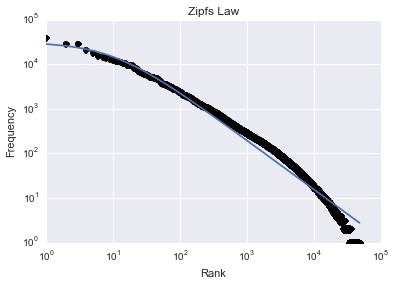

In [157]:
plt.title('Zipfs Law ')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.plot(data['rank'], data['frequency'], 'ko')
plt.plot(data['rank'], zipf(data['rank'],*popt))

In [158]:
print "Estimated Values \na =", popt[0],"\nb =", 10,"\nc =", popt[2]

Estimated Values 
a = 394749.592424 
b = 10 
c = -1.10008529515


Most Frequent terms and the tail are noisy, even though the model fits the data and satisfies Zips Law. 

###### Heaps Law
d = k * N ^ beta 

##### Pre Prcessing Steps Done:
- Create indices containing different numbers of novels 5,10,15,20,25,30,33
- Use the java program `CountWords3.java` to count the total number of words in each index, and the number of different words in each. 
- Summarize this result in `Occurences.txt`.

In [159]:
heaps_data = pd.read_table('../Data/Occurences.txt', sep =',')
heaps_data.head()

,Number of novels,Distinct words,Word occurrences
0,5,23866,504762
1,10,27827,622554
2,15,34224,947652
3,20,40351,1146950
4,25,55392,1661664


In [160]:
def heaps(x, K, b):
    return K * x ** b
popt1, pcov1 = curve_fit(heaps, heaps_data['Word occurrences'], heaps_data['Distinct words'])

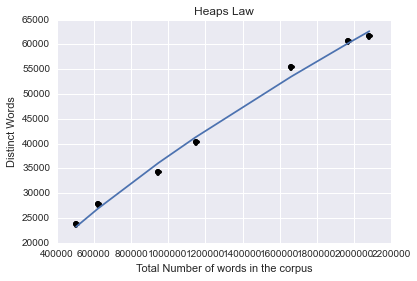

In [161]:
plt.title('Heaps Law')
plt.ylabel('Distinct Words')
plt.xlabel('Total Number of words in the corpus')
plt.plot(heaps_data['Word occurrences'], heaps_data['Distinct words'], 'ko')
plt.plot(heaps_data['Word occurrences'], heaps(heaps_data['Word occurrences'],*popt1))

In [162]:
print "Estimated Values \nk = ", popt1[0],"\nbeta =", popt1[1]

Estimated Values 
k =  2.34317753123 
beta = 0.700676171957


Our model fits the data well and satisfies Heaps Law.